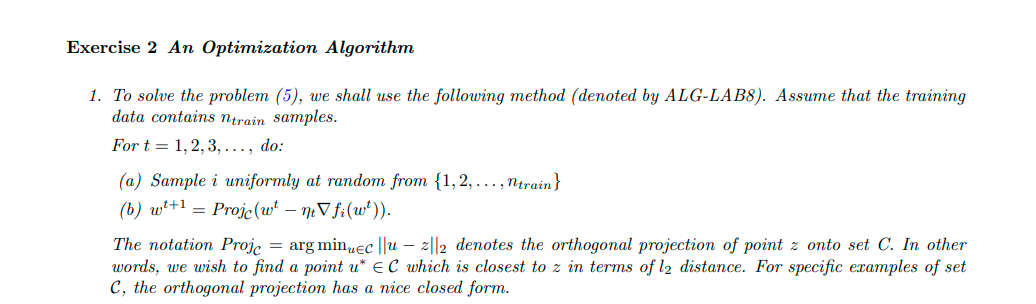

The ALG-LAB8 method outlined in Exercise 2 is an iterative optimization algorithm for solving the constrained optimization problem. Here's a breakdown of the steps:

**1.Initialization:** Initialize the model parameter w.

**2.Iteration:**

       .For each iteration t:
           .Sample i uniformly at random from {1, 2, ..., ntrain}
           .Compute the gradient ∇fi(wt) for the loss function fi at the current model parameter wt.
           .Update the model parameter using the projected gradient descent step: wt+1 = ProjC(wt - ηt∇fi(wt)), where ProjC denotes the orthogonal projection of the point wt - ηt∇fi(wt) onto the set C, and ηt is the learning rate at iteration t.
**3.**Repeat the iteration process until convergence or for a fixed number of iterations.

**4.**Return the final model parameter w.

 This algorithm iterates through the training data, updating the model parameter in the direction of the negative gradient, and then projecting the updated parameter onto the feasible set C to ensure it satisfies the constraints.

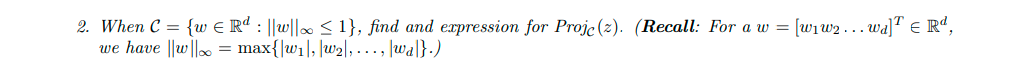

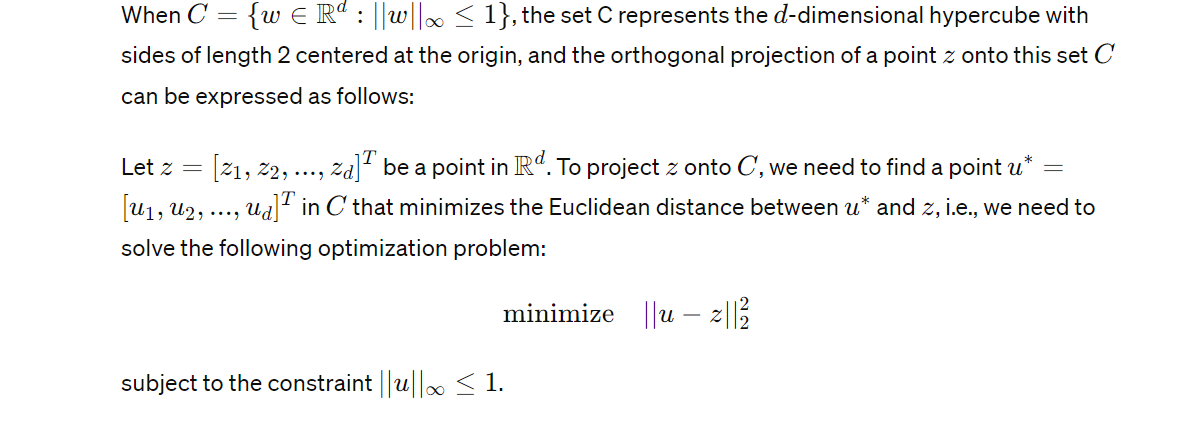

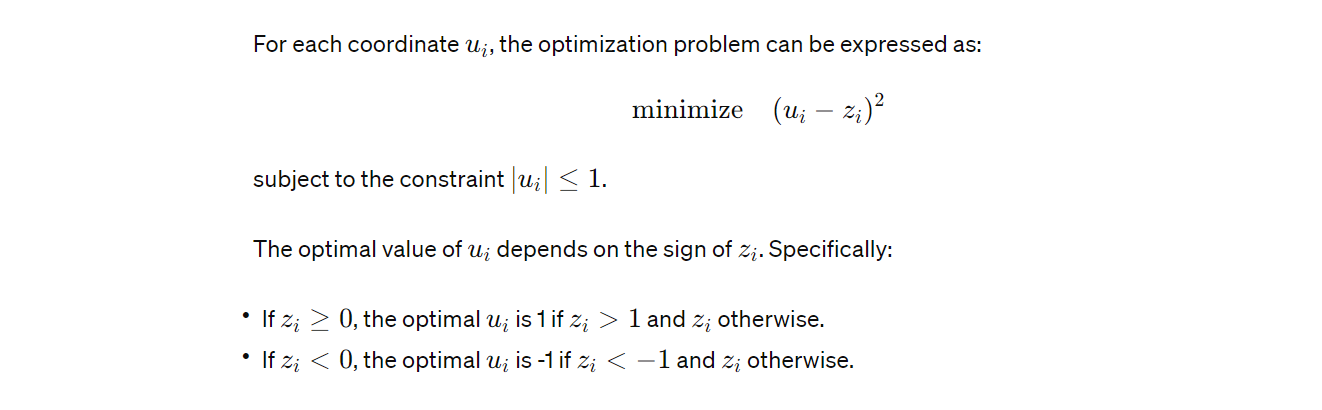

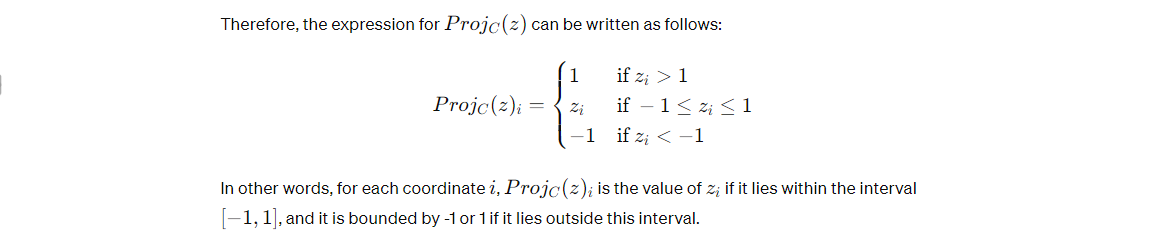

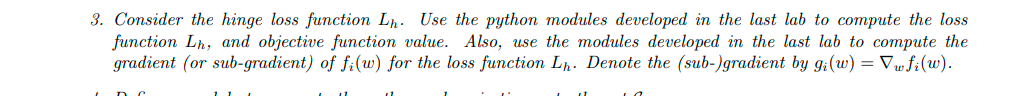

In [5]:
import numpy as np

# Define the hinge loss function Lh
def hinge_loss(y, w, x):
  n=len(w)
  x_=x.reshape(n,1)
  return np.maximum(0, 1 - y *w.T@x)
def log_loss(y,w,x):
  z=-y*w.T@x
  z_star=np.clip(z,-20,20)
  return np.log(1+np.exp(z_star))
def squared_loss(y,w,x):
  n=len(w)
  x_=x.reshape(n,1)
  z=np.maximum(0,1-y*w.T@x_)
  return z**2



# Define the objective function f(w)
def objective_function(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    hinge_loss_term = (1 / n) * np.sum([hinge_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + hinge_loss_term

def objective_log(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    log_loss_term = (1 / n) * np.sum([log_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + log_loss_term

def objective_squared(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    squared_loss_term = (1 / n) * np.sum([squared_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + squared_loss_term


# Define the gradient or sub-gradient function for fi(w) with the hinge loss function Lh
def gradient_hinge_loss(y, w, x, lamda,X):
    n=len(X)
    if 1 - y * w.T@x > 0:
        return (lamda*w/n) -(y * x)/n
    else:
        return (lamda*w/n) + np.zeros_like(w)

4. Define a module to compute the orthogonal projection onto the set C.

In [6]:

# Or i can define a shortened function in python as
def projection_function(z):
  return np.clip(z,-1,1)


5. Modify the code template given in the last lab to implement ALG-Lab8. Use the following code template.

In [7]:
import numpy as np
import random

def OPT1(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.zeros((d, 1))

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x, lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1
    return w

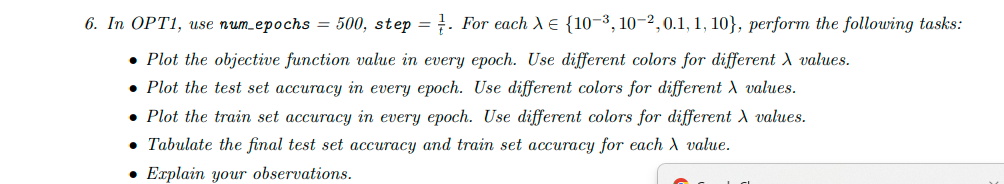

In [8]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()



# Access the features (X) and target (y) variables
X = wine_data.data  # Features
y = wine_data.target  # Target variable
transformed_label=[1]*len(wine_data.data)
for i in range(len(y)):
  if y[i]!=1:
    transformed_label[i]=-1

#Normalising the columns of A
A=wine_data.data
import numpy as np



# Normalize the columns of A
min_vals = np.min(A, axis=0)  # Minimum values of each column
max_vals = np.max(A, axis=0)  # Maximum values of each column

# Min-Max normalization
A_normalized = -1 + 2 * ((A - min_vals) / (max_vals - min_vals))

import random
index_array=[i for i in range(len(wine_data.data))]
for i in range(178):
  random.shuffle(index_array)
train_size=int(0.8*len(index_array)) # Use first 80 percent of the index for trainining examples and rest for testing examples
train_index=index_array[:train_size]
test_index=index_array[train_size:]

train_data1=[A[i] for i in train_index]
test_data1=[A[i] for i in test_index]
train_data=np.array(train_data1)
test_data=np.array(test_data1)
train_label1=[transformed_label[i] for i in train_index]
train_label=np.array(train_label1)
test_label1=[transformed_label[i] for i in test_index]
test_label=np.array(test_label1)


In [9]:
def Objective_value(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_function(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [10]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val=[]
for i in lam:
  a=Objective_value(data,label,i,500)
  obj_val.append(a)

In [11]:
import matplotlib.pyplot as plt

def plot_lambda_values(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

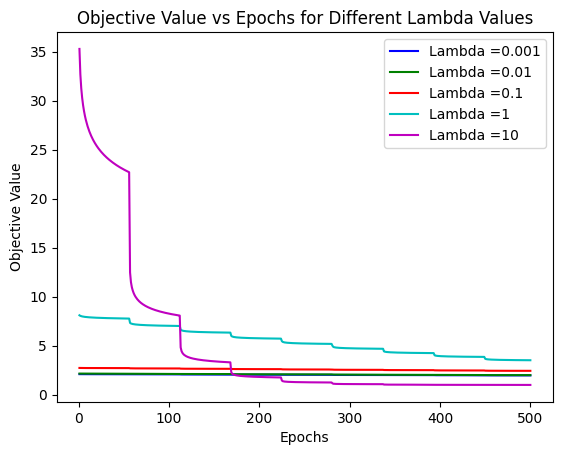

In [12]:
plot_lambda_values(obj_val)

In [13]:
def predict1(w,x):
  if w.T@x>0:
    return 1
  elif w.T@x<0:
    return -1
def accuracy1(data,label,model_w):
  k=0
  n=len(data)
  d=data.shape[1]
  for i in range(n):
    a=predict1(model_w,data[i].reshape(d,1))
    if a==label[i]:
      k+=1
  acc=float((k/n)*100)
  return acc

def test_set_acc(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [14]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val=[]
for i in lam:
  a=test_set_acc(data1,label1,i,500)
  acc_val.append(a)

In [15]:
import matplotlib.pyplot as plt

def plot_acc_values(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

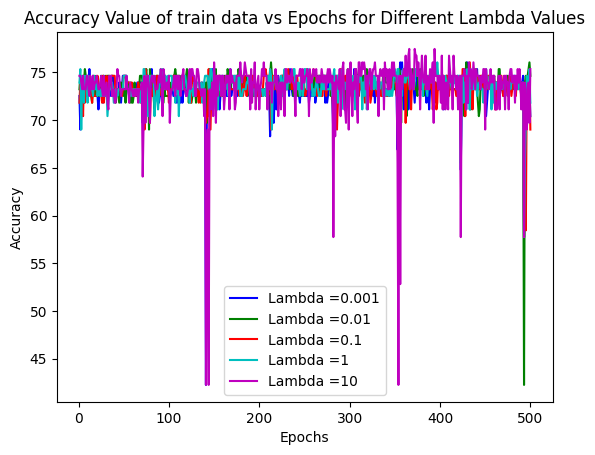

In [16]:
plot_acc_values(acc_val)

In [17]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val2=[]
for i in lam:
  a=test_set_acc(data2,label2,i,500)
  acc_val2.append(a)

In [18]:
import matplotlib.pyplot as plt

def plot_acc_values2(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

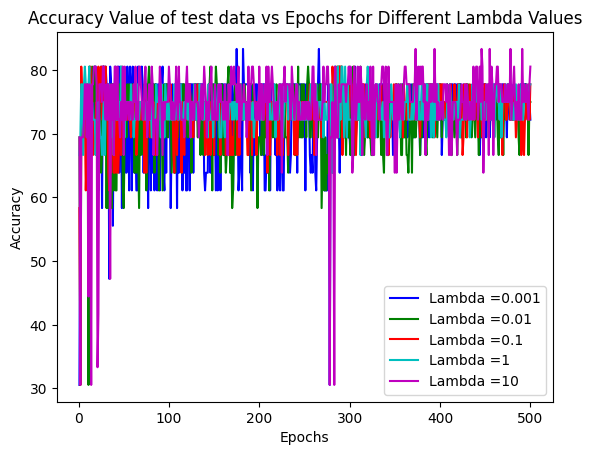

In [19]:
plot_acc_values2(acc_val2)

In [20]:
import pandas as pd

# Create an empty DataFrame
empty_df = pd.DataFrame()
empty_df["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val[0],acc_val2[0]))
empty_df["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val[1],acc_val2[1]))
empty_df["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val[2],acc_val2[2]))
empty_df["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val[3],acc_val2[3]))
empty_df["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val[4],acc_val2[4]))
empty_df

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(72.53521126760563, 30.555555555555557)","(73.23943661971832, 69.44444444444444)","(71.83098591549296, 58.333333333333336)","(73.94366197183099, 66.66666666666666)","(74.64788732394366, 69.44444444444444)"
1,"(69.01408450704226, 69.44444444444444)","(74.64788732394366, 30.555555555555557)","(73.94366197183099, 30.555555555555557)","(75.35211267605634, 69.44444444444444)","(74.64788732394366, 30.555555555555557)"
2,"(70.4225352112676, 69.44444444444444)","(73.94366197183099, 69.44444444444444)","(74.64788732394366, 80.55555555555556)","(69.01408450704226, 77.77777777777779)","(73.94366197183099, 69.44444444444444)"
3,"(72.53521126760563, 69.44444444444444)","(73.23943661971832, 69.44444444444444)","(73.94366197183099, 75.0)","(74.64788732394366, 77.77777777777779)","(73.23943661971832, 69.44444444444444)"
4,"(72.53521126760563, 69.44444444444444)","(74.64788732394366, 69.44444444444444)","(70.4225352112676, 77.77777777777779)","(73.94366197183099, 66.66666666666666)","(74.64788732394366, 69.44444444444444)"
...,...,...,...,...,...
495,"(71.12676056338029, 75.0)","(73.23943661971832, 75.0)","(73.94366197183099, 75.0)","(74.64788732394366, 77.77777777777779)","(69.01408450704226, 77.77777777777779)"
496,"(74.64788732394366, 72.22222222222221)","(74.64788732394366, 75.0)","(74.64788732394366, 72.22222222222221)","(73.23943661971832, 75.0)","(70.4225352112676, 75.0)"
497,"(74.64788732394366, 72.22222222222221)","(75.35211267605634, 66.66666666666666)","(71.83098591549296, 77.77777777777779)","(73.94366197183099, 75.0)","(73.94366197183099, 72.22222222222221)"
498,"(73.94366197183099, 75.0)","(76.05633802816901, 75.0)","(75.35211267605634, 72.22222222222221)","(75.35211267605634, 77.77777777777779)","(69.71830985915493, 77.77777777777779)"


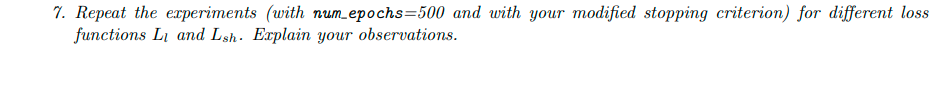

In [21]:
def logistic_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  z_star=np.clip(z,-500,500)
  return lamda*w/n + (1/n)*(-y*x*(np.exp(z_star-1)))/(1+np.exp(z_star-1))

def squared_hinge_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  if z>0:
    return (lamda*w/n) +(1/n)*(-2*y*x)*(z)
  else:
    return lamda*w/n

In [22]:
def Objective_value_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_log(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [23]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_log=[]
for i in lam:
  b=Objective_value_logistic(data,label,i,500)
  obj_val_log.append(b)

In [23]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-log')
    plt.title('Objective-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [24]:
def set_acc_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [25]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val_log=[]
for i in lam:
  c=set_acc_logistic(data1,label1,i,500)
  acc_val_log.append(c)

In [26]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_log2=[]
for i in lam:
  d=set_acc_logistic(data2,label2,i,500)
  acc_val_log2.append(d)

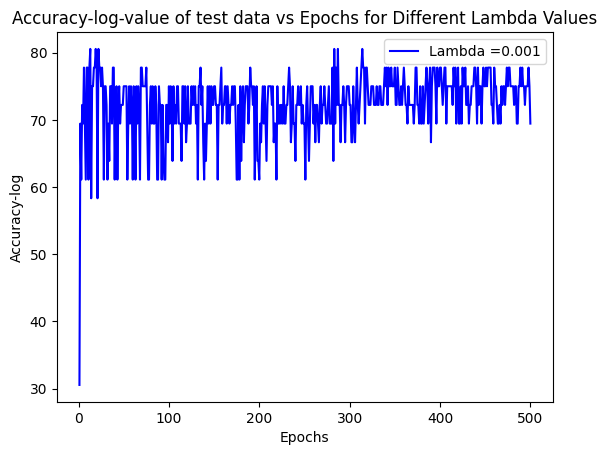

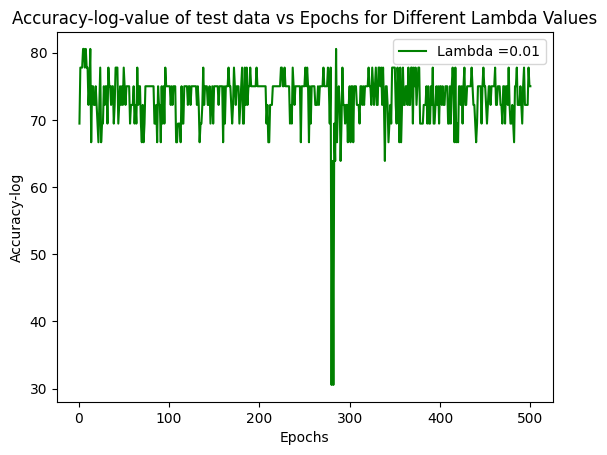

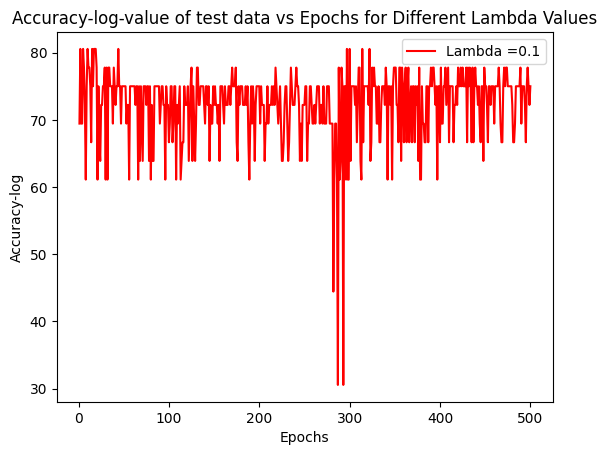

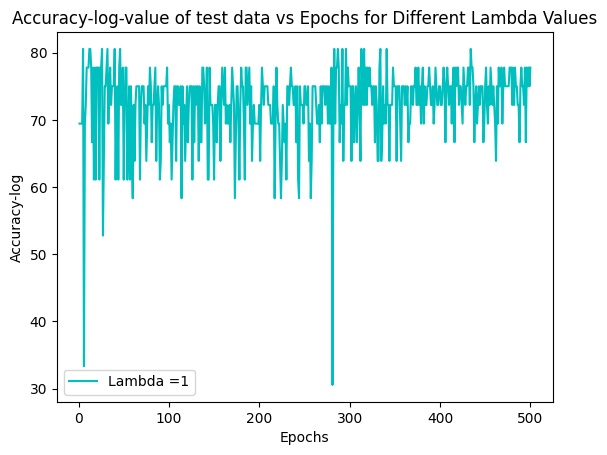

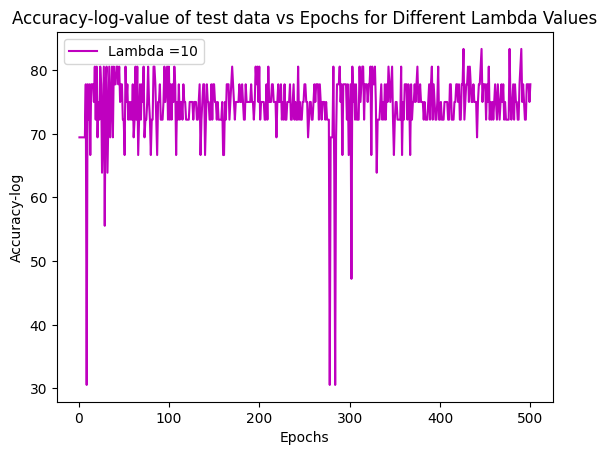

In [27]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log2):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

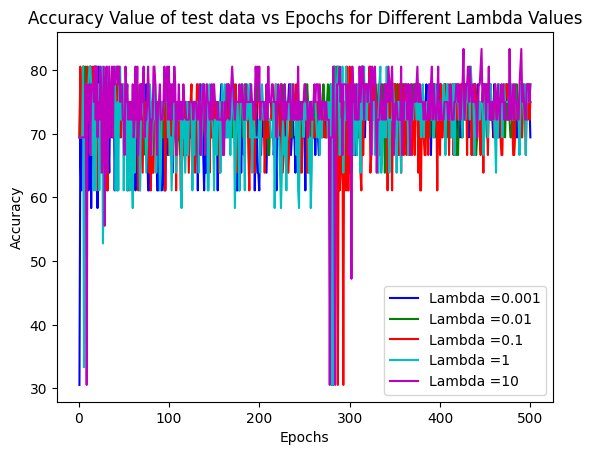

In [28]:
plot_acc_values2(acc_val_log2)

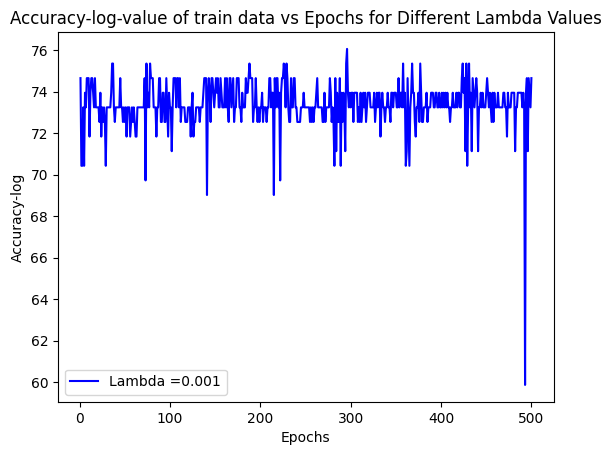

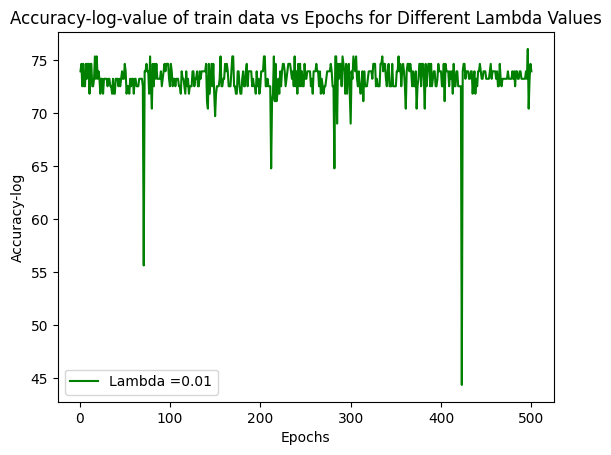

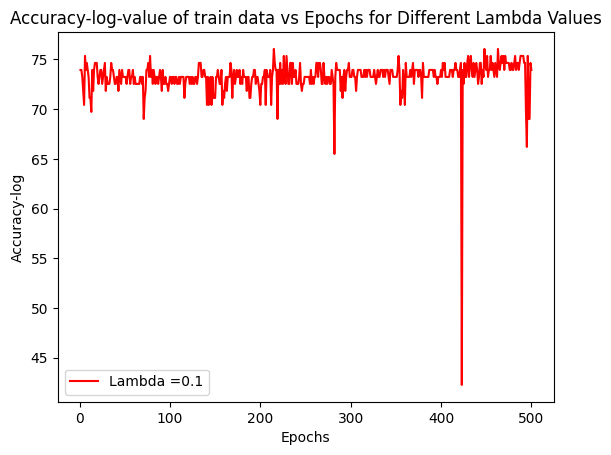

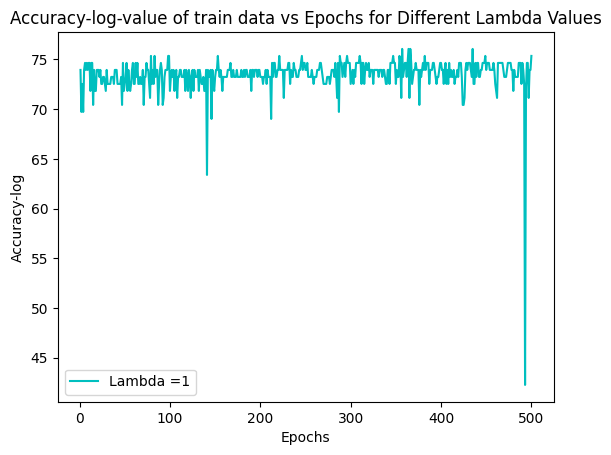

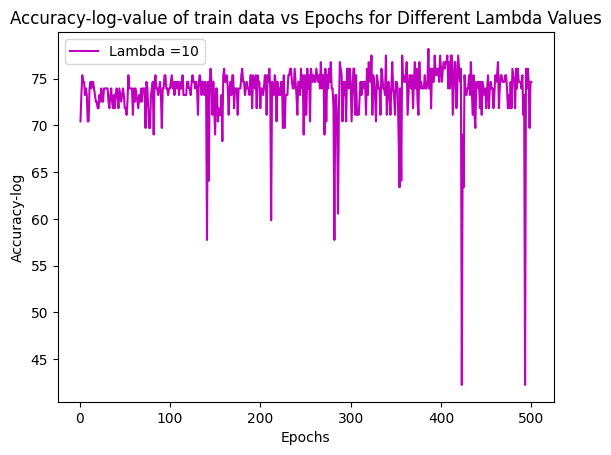

In [29]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [30]:
def Objective_value_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val2 = objective_squared(w, lambda_val, data, label)
        objective_values.append(val2)

    return objective_values


In [31]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_sqr=[]
for i in lam:
  e=Objective_value_squared(data,label,i,500)
  obj_val_sqr.append(e)

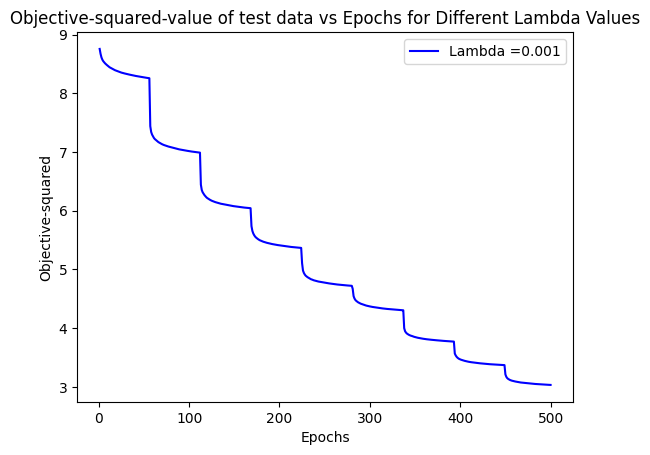

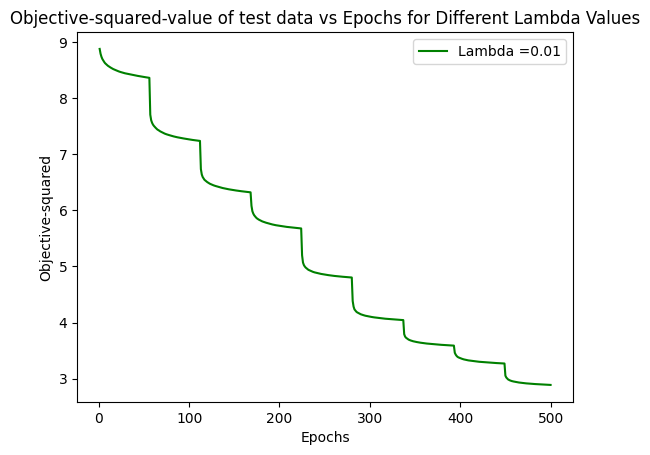

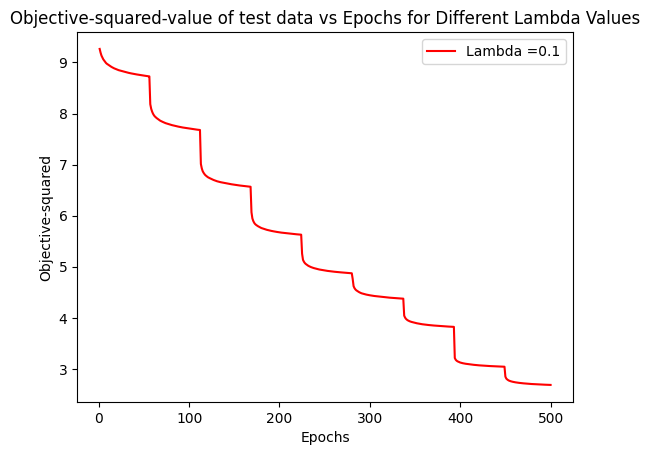

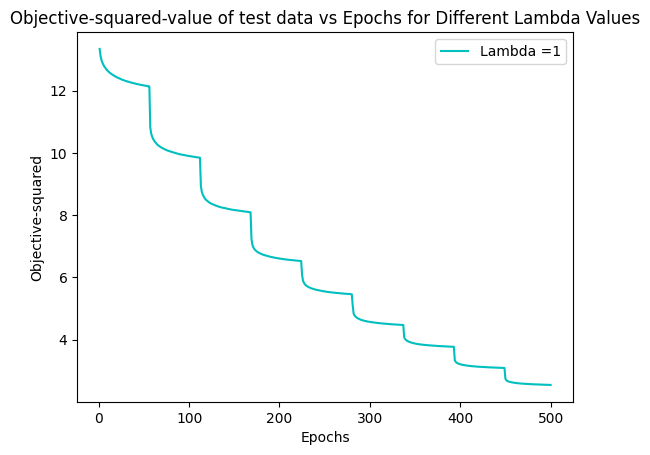

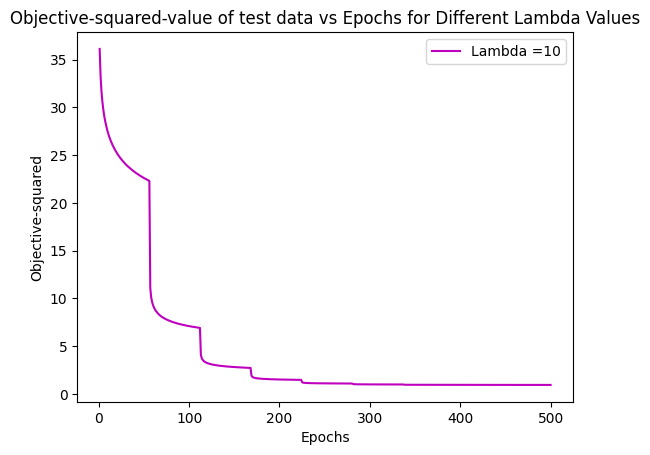

In [32]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_sqr):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-squared')
    plt.title('Objective-squared-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [33]:
import matplotlib.pyplot as plt

def plot_lambda_values3(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value  of squared vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

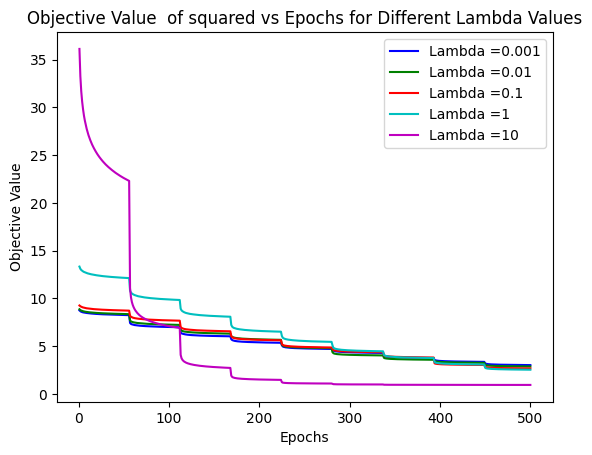

In [34]:
plot_lambda_values3(obj_val_sqr)

In [35]:
def set_acc_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [36]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_sqr=[]
for i in lam:
  d1=set_acc_squared(data2,label2,i,500)
  acc_val_sqr.append(d1)

In [37]:
import matplotlib.pyplot as plt

def plot_acc_sqrtest(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

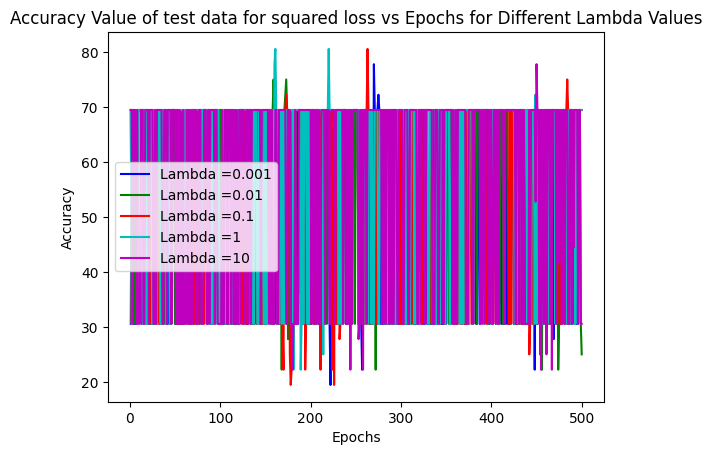

In [38]:
plot_acc_sqrtest(acc_val_sqr)

In [39]:
import matplotlib.pyplot as plt

def plot_acc_sqrtrain(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [40]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=train_data
label2=train_label

acc_val_sqr2=[]
for i in lam:
  d2=set_acc_squared(data2,label2,i,500)
  acc_val_sqr2.append(d2)

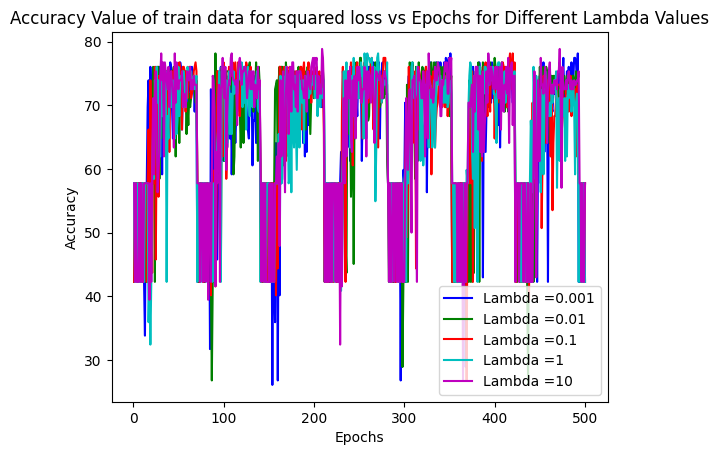

In [41]:
plot_acc_sqrtrain(acc_val_sqr2)

In [42]:
for i in acc_val_sqr2:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_sqr:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [43]:
# Create an empty DataFrame
df_squared_accuracy = pd.DataFrame()
df_squared_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[0],acc_val_sqr[0]))
df_squared_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[1],acc_val_sqr[1]))
df_squared_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[2],acc_val_sqr[2]))
df_squared_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[3],acc_val_sqr[3]))
df_squared_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[4],acc_val_sqr[4]))
df_squared_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(57.75, 30.56)","(42.25, 69.44)","(42.25, 69.44)","(57.75, 69.44)","(57.75, 69.44)"
1,"(57.75, 69.44)","(57.75, 69.44)","(57.75, 30.56)","(42.25, 30.56)","(42.25, 69.44)"
2,"(57.75, 69.44)","(57.75, 69.44)","(57.75, 69.44)","(57.75, 30.56)","(57.75, 30.56)"
3,"(57.75, 30.56)","(57.75, 69.44)","(42.25, 69.44)","(42.25, 69.44)","(42.25, 69.44)"
4,"(42.25, 30.56)","(42.25, 69.44)","(57.75, 69.44)","(57.75, 69.44)","(42.25, 69.44)"
...,...,...,...,...,...
495,"(57.75, 69.44)","(57.75, 30.56)","(42.25, 69.44)","(57.75, 30.56)","(42.25, 30.56)"
496,"(42.25, 69.44)","(42.25, 69.44)","(57.75, 69.44)","(42.25, 69.44)","(57.75, 69.44)"
497,"(57.75, 69.44)","(42.25, 69.44)","(42.25, 69.44)","(42.25, 69.44)","(42.25, 69.44)"
498,"(57.75, 69.44)","(57.75, 30.56)","(42.25, 69.44)","(57.75, 69.44)","(42.25, 30.56)"


 **Tabulating The values for Logistic Objective**

In [44]:
for i in acc_val_log:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_log2:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [45]:
# Create an empty DataFrame
df_logistic_accuracy = pd.DataFrame()
df_logistic_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_log[0],acc_val_log2[0]))
df_logistic_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_log[1],acc_val_log2[1]))
df_logistic_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_log[2],acc_val_log2[2]))
df_logistic_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_log[3],acc_val_log2[3]))
df_logistic_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_log[4],acc_val_log2[4]))
df_logistic_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(74.65, 30.56)","(73.94, 69.44)","(73.94, 69.44)","(73.94, 69.44)","(70.42, 69.44)"
1,"(70.42, 69.44)","(74.65, 77.78)","(73.94, 80.56)","(69.72, 69.44)","(73.24, 69.44)"
2,"(70.42, 61.11)","(72.54, 77.78)","(73.24, 69.44)","(72.54, 69.44)","(75.35, 69.44)"
3,"(73.24, 72.22)","(74.65, 77.78)","(71.83, 69.44)","(69.72, 69.44)","(74.65, 69.44)"
4,"(70.42, 69.44)","(72.54, 80.56)","(70.42, 80.56)","(73.94, 80.56)","(74.65, 69.44)"
...,...,...,...,...,...
495,"(71.13, 75.0)","(76.06, 72.22)","(75.35, 75.0)","(74.65, 77.78)","(76.06, 77.78)"
496,"(74.65, 75.0)","(70.42, 72.22)","(69.01, 77.78)","(71.13, 75.0)","(74.65, 77.78)"
497,"(73.94, 77.78)","(73.24, 77.78)","(69.01, 75.0)","(73.94, 77.78)","(69.72, 77.78)"
498,"(73.24, 75.0)","(74.65, 75.0)","(74.65, 72.22)","(73.94, 75.0)","(74.65, 75.0)"


**OBSERVATIONS:**

The comparison of accuracy between logistic loss and squared loss reveals significant differences. Logistic loss consistently yields higher accuracy for both training and test datasets compared to squared loss. Conversely, squared loss results in the lowest accuracy among the considered loss functions. This observation underscores the superior performance of logistic loss in classification tasks. Logistic loss, being tailored for classification problems, effectively penalizes misclassifications and facilitates better optimization of model parameters. In contrast, squared loss might not adequately capture the nuances of classification tasks, leading to suboptimal performance. These findings emphasize the critical role of selecting an appropriate loss function tailored to the specific characteristics of the dataset to achieve optimal model performance in classification tasks.